In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Toy example: sales predictions

In [2]:
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/Advertising.csv'
sales = pd.read_csv(path)
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
len(sales)

200

goal: to predict sales based on

- TV: dollars spent on TV ads (in thousands of dollars)
- Radio: dollars spent on radio ads
- Newspaper: dollrs spent on newspapers ads

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# feature matrix X/target vector y
X = sales[['TV','Radio','Newspaper']]
y = sales.Sales

In [6]:
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)

In [7]:
# model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
# MSE: on average, the predictions are off by about 1600 dollars
np.sqrt(mean_squared_error(y,y_pred))

1.6685701407225697

In [9]:
# MAE
mean_absolute_error(y,y_pred)

1.2520112296870685

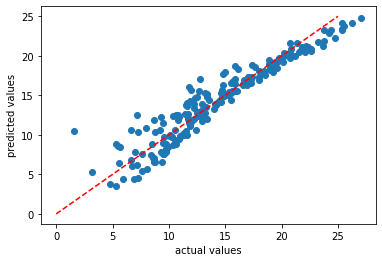

In [10]:
# plot predictions and actual values
plt.scatter(y,y_pred)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.plot([0,25],[0,25],'--',color='red')

## Predicting bycycle traffic across Seattle's Fremont bridge

In [11]:
fremont = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv',index_col='Date',parse_dates=True)
fremont

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2022-09-30 19:00:00,168.0,57.0,111.0
2022-09-30 20:00:00,73.0,33.0,40.0
2022-09-30 21:00:00,69.0,30.0,39.0


In [12]:
# daily traffic
fremont = fremont.resample('d').sum()
fremont

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,3521.0,1760.0,1761.0
2012-10-04,3475.0,1708.0,1767.0
2012-10-05,3148.0,1558.0,1590.0
2012-10-06,2006.0,1080.0,926.0
2012-10-07,2142.0,1191.0,951.0
...,...,...,...
2022-09-26,3187.0,1218.0,1969.0
2022-09-27,3672.0,1383.0,2289.0
2022-09-28,2906.0,1061.0,1845.0


<AxesSubplot:xlabel='Date'>

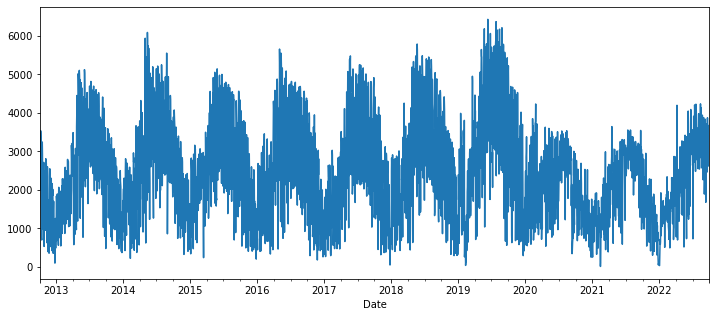

In [13]:
# plot daily traffic
fremont['Fremont Bridge Total'].plot(figsize=(12,5))

In [14]:
# day of the week/month/covid
fremont['day_of_week'] = fremont.index.dayofweek
fremont['month'] = fremont.index.month
fremont['year'] = fremont.index.year
fremont['covid'] = 0
fremont.loc['03-01-2020':,'covid'] = 1
fremont

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,day_of_week,month,year,covid
Date,,,,,,,
2012-10-03,3521.0,1760.0,1761.0,2,10,2012,0
2012-10-04,3475.0,1708.0,1767.0,3,10,2012,0
2012-10-05,3148.0,1558.0,1590.0,4,10,2012,0
2012-10-06,2006.0,1080.0,926.0,5,10,2012,0
2012-10-07,2142.0,1191.0,951.0,6,10,2012,0
...,...,...,...,...,...,...,...
2022-09-26,3187.0,1218.0,1969.0,0,9,2022,1
2022-09-27,3672.0,1383.0,2289.0,1,9,2022,1
2022-09-28,2906.0,1061.0,1845.0,2,9,2022,1


In [15]:
# holidays
from pandas.tseries.holiday import USFederalHolidayCalendar
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays('01-01-2013','09-30-2022')
fremont['holidays'] = pd.Series(1,index=holidays,name='holidays')
fremont.fillna(0,inplace=True)
fremont

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,day_of_week,month,year,covid,holidays
Date,,,,,,,,
2012-10-03,3521.0,1760.0,1761.0,2,10,2012,0,0.0
2012-10-04,3475.0,1708.0,1767.0,3,10,2012,0,0.0
2012-10-05,3148.0,1558.0,1590.0,4,10,2012,0,0.0
2012-10-06,2006.0,1080.0,926.0,5,10,2012,0,0.0
2012-10-07,2142.0,1191.0,951.0,6,10,2012,0,0.0
...,...,...,...,...,...,...,...,...
2022-09-26,3187.0,1218.0,1969.0,0,9,2022,1,0.0
2022-09-27,3672.0,1383.0,2289.0,1,9,2022,1,0.0
2022-09-28,2906.0,1061.0,1845.0,2,9,2022,1,0.0


In [16]:
# hours of daylight
def get_hoursdaylight(date):
    axis = np.radians(23.44) # tilt of Earth's axis
    latitude = np.radians(47.61) # Seattle's latidude 
    days = (date-pd.to_datetime('2000-12-31')).days
    m = (1 - np.tan(latitude)*np.tan(axis*np.cos(days*2*np.pi/365.25)))
    return 24*np.degrees(np.arccos(1-m))/180
fremont['hours_daylight'] = fremont.index.map(get_hoursdaylight)

<AxesSubplot:xlabel='Date'>

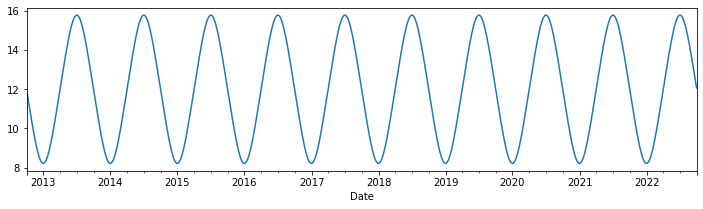

In [17]:
fremont.hours_daylight.plot(figsize=(12,3))

In [18]:
# weather features
weather = pd.read_csv('Seattle_weather.csv',index_col='DATE',parse_dates=True)
# PRCP (precipitation), TAVG (average temperature), SNOW (snowfall), AWND (average wind speed)
weather[['PRCP','TAVG','SNOW','AWND']].isna().sum()

PRCP     3
TAVG    90
SNOW     0
AWND     1
dtype: int64

<AxesSubplot:xlabel='DATE'>

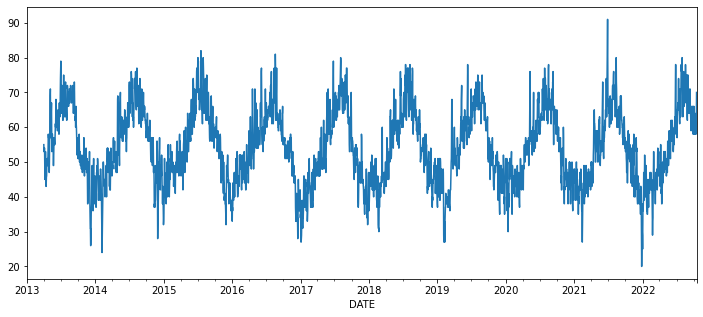

In [19]:
weather.TAVG.plot(figsize=(12,5))

In [20]:
weather.TAVG.fillna(0.5*(weather.TMAX+weather.TMIN),inplace=True)

In [21]:
fremont = fremont.join(weather[['PRCP','TAVG','SNOW','AWND']]).loc['2013-01-01':]
fremont

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,day_of_week,month,year,covid,holidays,hours_daylight,PRCP,TAVG,SNOW,AWND
Date,,,,,,,,,,,,,
2013-01-01,678.0,344.0,334.0,1,1,2013,0,1.0,8.219578,0.00,34.0,0.0,6.04
2013-01-02,1835.0,904.0,931.0,2,1,2013,0,0.0,8.221629,0.00,36.5,0.0,7.16
2013-01-03,1803.0,890.0,913.0,3,1,2013,0,0.0,8.225045,0.16,36.5,0.0,6.71
2013-01-04,1712.0,836.0,876.0,4,1,2013,0,0.0,8.229824,0.10,43.0,0.0,6.26
2013-01-05,719.0,403.0,316.0,5,1,2013,0,0.0,8.235960,0.12,42.0,0.0,6.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,3187.0,1218.0,1969.0,0,9,2022,1,0.0,12.305350,0.00,66.0,0.0,3.36
2022-09-27,3672.0,1383.0,2289.0,1,9,2022,1,0.0,12.246540,0.00,66.0,0.0,5.82
2022-09-28,2906.0,1061.0,1845.0,2,9,2022,1,0.0,12.187697,0.03,58.0,0.0,5.37


In [22]:
# air quality index
aqi = pd.read_csv('Seattle_air_quality_index.csv',index_col='Date',parse_dates=True)
#fremont['aqi'] = aqi

In [23]:
fremont.isna().sum()

Fremont Bridge Total            0
Fremont Bridge East Sidewalk    0
Fremont Bridge West Sidewalk    0
day_of_week                     0
month                           0
year                            0
covid                           0
holidays                        0
hours_daylight                  0
PRCP                            3
TAVG                            0
SNOW                            0
AWND                            0
dtype: int64

In [24]:
fremont.fillna(method='ffill',inplace=True)

In [25]:
fremont.isna().sum()

Fremont Bridge Total            0
Fremont Bridge East Sidewalk    0
Fremont Bridge West Sidewalk    0
day_of_week                     0
month                           0
year                            0
covid                           0
holidays                        0
hours_daylight                  0
PRCP                            0
TAVG                            0
SNOW                            0
AWND                            0
dtype: int64

In [26]:
# 2013-2020
fremont2013_2020 = fremont[fremont.index.year<2021].copy()
# 2020-2022
fremont2021_2022 = fremont[fremont.index.year>=2021].copy()

In [27]:
fremont2013_2020

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,day_of_week,month,year,covid,holidays,hours_daylight,PRCP,TAVG,SNOW,AWND
Date,,,,,,,,,,,,,
2013-01-01,678.0,344.0,334.0,1,1,2013,0,1.0,8.219578,0.00,34.0,0.0,6.04
2013-01-02,1835.0,904.0,931.0,2,1,2013,0,0.0,8.221629,0.00,36.5,0.0,7.16
2013-01-03,1803.0,890.0,913.0,3,1,2013,0,0.0,8.225045,0.16,36.5,0.0,6.71
2013-01-04,1712.0,836.0,876.0,4,1,2013,0,0.0,8.229824,0.10,43.0,0.0,6.26
2013-01-05,719.0,403.0,316.0,5,1,2013,0,0.0,8.235960,0.12,42.0,0.0,6.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,876.0,398.0,478.0,6,12,2020,1,0.0,8.229824,0.13,44.0,0.0,6.71
2020-12-28,1758.0,761.0,997.0,0,12,2020,1,0.0,8.225045,0.00,41.0,0.0,7.83
2020-12-29,1042.0,448.0,594.0,1,12,2020,1,0.0,8.221629,0.16,39.0,0.0,4.70


In [28]:
fremont2021_2022

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,day_of_week,month,year,covid,holidays,hours_daylight,PRCP,TAVG,SNOW,AWND
Date,,,,,,,,,,,,,
2021-01-01,448.0,201.0,247.0,4,1,2021,1,1.0,8.219578,0.42,48.0,0.0,10.07
2021-01-02,253.0,120.0,133.0,5,1,2021,1,0.0,8.221629,1.71,48.0,0.0,16.11
2021-01-03,914.0,439.0,475.0,6,1,2021,1,0.0,8.225045,0.44,44.0,0.0,10.07
2021-01-04,634.0,222.0,412.0,0,1,2021,1,0.0,8.229824,0.39,47.0,0.0,13.65
2021-01-05,782.0,290.0,492.0,1,1,2021,1,0.0,8.235960,0.66,44.0,0.0,10.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,3187.0,1218.0,1969.0,0,9,2022,1,0.0,12.305350,0.00,66.0,0.0,3.36
2022-09-27,3672.0,1383.0,2289.0,1,9,2022,1,0.0,12.246540,0.00,66.0,0.0,5.82
2022-09-28,2906.0,1061.0,1845.0,2,9,2022,1,0.0,12.187697,0.03,58.0,0.0,5.37


In [29]:
y2013_2020 = fremont2013_2020['Fremont Bridge Total']
X2013_2020 = fremont2013_2020[['day_of_week','covid','holidays','hours_daylight','PRCP','TAVG','SNOW','AWND','year','aqi']]

KeyError: "['aqi'] not in index"

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures

In [ ]:
# regression pipeline

num_features = ['hours_daylight','PRCP','TAVG','SNOW','AWND']
cat_features = ['day_of_week','covid','holidays']


feature_processor = ColumnTransformer(transformers=[
    ('encoder',OneHotEncoder(),cat_features),
],remainder='passthrough')

pipe = Pipeline(steps=[
    ('feature_processor',feature_processor),
    ('poly_features',PolynomialFeatures(degree=1)),
    ('regression',LinearRegression())
])

In [ ]:
pipe

In [ ]:
pipe.fit(X2013_2020,y2013_2020)
fremont2013_2020['predicted'] = pipe.predict(X2013_2020)

In [ ]:
# daily traffic: actual and predicted
fremont2013_2020[['Fremont Bridge Total','predicted']].plot(figsize=(12,5),alpha=0.7)

In [ ]:
# monthly traffic: actual and predicted
fremont2013_2020[['Fremont Bridge Total','predicted']].resample('m').sum().plot(figsize=(12,5))

In [ ]:
# yearly traffic: actual and predicted
fremont2013_2020[['Fremont Bridge Total','predicted']].resample('y').sum().plot(figsize=(12,5))

## Coefficients (no polynomial features)

## Data Science Fiction: 2021-2022 without COVID

In [ ]:
# set covid feature to zero
fremont2021_2022.covid = 0

In [ ]:
X2021_2022 = fremont2021_2022[['day_of_week','covid','holidays',
                              'hours_daylight','year','PRCP','TAVG','SNOW','AWND','aqi']]
y2021_2022 = fremont2021_2022['Fremont Bridge Total']

In [ ]:
fremont2021_2022['prediction'] = pipe.predict(X2021_2022)

In [ ]:
fremont2021_2022[['Fremont Bridge Total','prediction']].plot(figsize=(12,5))

## Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
# regression pipeline
pipe = Pipeline(steps=[
    ('feature_processor',feature_processor),
    ('poly_features',PolynomialFeatures(degree=1)),
    ('regressor',Ridge(alpha=1)) # or Lasso
])

In [ ]:
param_dic = {'poly_features__degree':[1,2,3],
             'regressor__alpha':[1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000]}

In [ ]:
grid = GridSearchCV(pipe,
             param_dic,
             scoring='neg_mean_squared_error' ,
             cv=10,
             n_jobs=-1,
             verbose=1)

In [ ]:
grid.fit(X2013_2020,y2013_2020)

In [ ]:
grid.best_params_

In [ ]:
best_pipe = grid.best_estimator_

In [ ]:
fremont2021_2022['prediction'] = best_pipe.predict(X2021_2022)

In [ ]:
fremont2021_2022[['Fremont Bridge Total','prediction']].plot(figsize=(12,5))

## Random Forest vs Regression

In [ ]:
plt.figure(figsize=(10,10))
fremont2013_2020.plot.scatter(x='Fremont Bridge Total',y='prediction')
plt.plot

In [ ]:
from sklearn.ensemble import RandomForestRegressor
pipe = Pipeline(steps=[
    ('feature_processor',feature_processor),
    ('poly_features',PolynomialFeatures(degree=1)),
    ('regression',RandomForestRegressor())
])

In [ ]:
from sklearn.model_selection